In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
emdat_data = pd.read_excel("data/public_emdat_incl_hist_2024-03-26.xlsx")

In [24]:
emdat_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update', 'Group_Subgroup_Type'],
      dtype='object')

# Origin values
Allow us to have acces to some type of text for some disasters type (the origin of the disaster), they are quite unique for each case without a lot of repetions...
Only 889 different origin name for a total of 4390 NOT nan

In [77]:
print(len(emdat_data["Origin"].dropna()))
emdat_data["Origin"].dropna().unique()

4390


array(['Earthquake', 'Violent storm', 'Meteorological',
       'Volacno and landslide', 'Collapse of bridges',
       'Storm and wave surge', 'Late arrival of rain',
       'Erreur aiguillage', 'Fire', 'Typhoon', 'Heavy rains',
       'Earthquake and landslide', 'Landslide', 'Heavy rain', 'Famine',
       'El Nino', 'Explosion during refueling', 'Short circuit',
       'Brief torrential rains', 'Gas leak', 'Monsoon rain',
       'Collision with a bus', 'Brief torrential rain', 'Drought period',
       'Rain, snowmelt', 'Monsoonal rain', 'Tropical cyclone',
       'Extra-tropical cyclone', 'Heavy rains and thunderstorms',
       'Prolonged drought', 'Monsoon rains',
       'Volcanic activity, tropical rainstorms and ash from the eruptions',
       'Monssonal rain', 'monsoonal rain', 'Heavy rains, tremor',
       'Snowmelt and Heavy rains', 'Heavy rain and Snowmelt', 'Snowmelt',
       'Hevay rain', 'Snow storm and heavy winds',
       'Heavy rains, melting snow', 'Rain and snowmelt',
  

In [80]:
# Group by 'Disaster Subgroup' and 'Disaster Type', then filter groups to only include those with at least one non-NaN 'Origin'
grouped = emdat_data.groupby(['Disaster Subgroup', 'Disaster Type'])
filtered_groups = grouped.filter(lambda x: x['Origin'].notna().any())

# Count occurrences of each unique origin for each disaster subgroup and type
origin_counts = filtered_groups.groupby(['Disaster Subgroup', 'Disaster Type', 'Origin']).size()

# Filter out categories with zero origin values
filtered_origin_counts = origin_counts[origin_counts > 0]
print(len(filtered_origin_counts))

# Sort the origin_counts in descending order to get the most frequent origins
sorted_origin_counts = filtered_origin_counts.groupby(level=['Disaster Subgroup', 'Disaster Type']).nlargest(4)

sorted_origin_counts.to_csv('origin.csv')
print(sorted_origin_counts)

889
Disaster Subgroup  Disaster Type        Disaster Subgroup  Disaster Type        Origin                                   
Meteorological     Storm                Meteorological     Storm                Heavy rains                                  7
                                                                                Heavy rain                                   5
                                                                                Torrential rains                             4
                                                                                Strong winds                                 3
                   Extreme temperature  Meteorological     Extreme temperature  Polar air mass flow                          2
                                                                                                                            ..
Transport          Air                  Transport          Air                  Collision                       

C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = emdat_data.groupby(['Disaster Subgroup', 'Disaster Type'])
C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  origin_counts = filtered_groups.groupby(['Disaster Subgroup', 'Disaster Type', 'Origin']).size()
C:\Users\david\AppData\Local\Temp\ipykernel_8268\1518624526.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

# Disaster types

<Axes: xlabel='count', ylabel='Disaster Subgroup'>

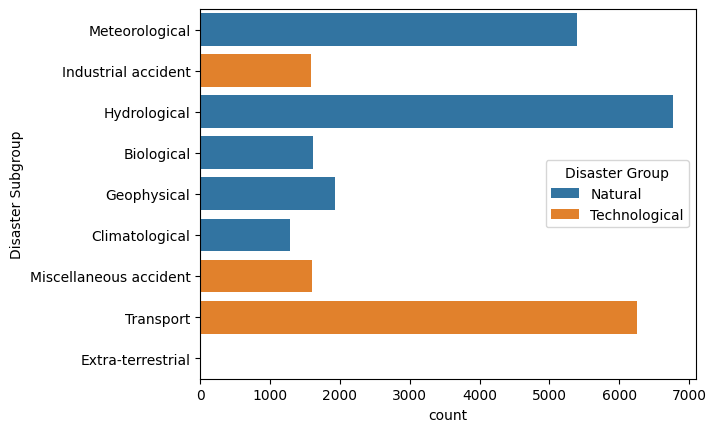

In [ ]:
sns.countplot(emdat_data, y="Disaster Subgroup", hue="Disaster Group")

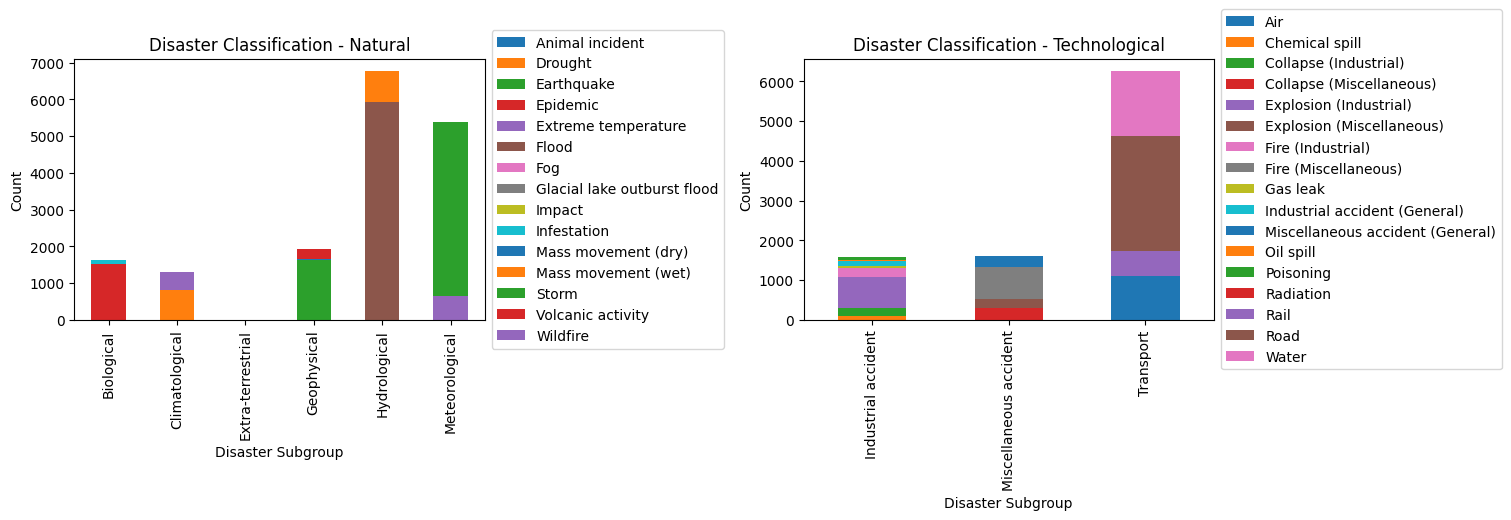

In [18]:
import matplotlib.pyplot as plt

# Get unique 'Disaster Group' values
disaster_groups = emdat_data['Disaster Group'].unique()

# Determine the layout of the subplots
n = len(disaster_groups)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a subplot for each 'Disaster Group'
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5), constrained_layout=True)

for ax, group in zip(axes.flatten(), disaster_groups):
    grouped = emdat_data[emdat_data['Disaster Group'] == group].groupby(['Disaster Subgroup', 'Disaster Type']).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Disaster Classification - {group}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove empty subplots
if len(disaster_groups) < nrows*ncols:
    for idx in range(len(disaster_groups), nrows*ncols):
        fig.delaxes(axes.flatten()[idx])

plt.show()